In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

path = 'data/dataset.csv'
df = pd.read_csv(path)

In [16]:
print(df.iloc[:5])

       Date  Value Value_Classification  BTC_Closing    BTC_Volume
0  2/1/2018   30.0                 Fear  9170.540039  9.959400e+09
1  2/2/2018   15.0         Extreme Fear  8830.750000  1.272690e+10
2  2/3/2018   40.0                 Fear  9174.910156  7.263790e+09
3  2/4/2018   24.0         Extreme Fear  8277.009766  7.073550e+09
4  2/5/2018   11.0         Extreme Fear  6955.270020  9.285290e+09


In [18]:
# identify duplicates based on the 'Date' column
duplicates = df.duplicated(subset='Date', keep=False)

# remove the duplicates
df = df[~duplicates].drop_duplicates()

Fear             644
Extreme Fear     528
Greed            338
Neutral          187
Extreme Greed    185
Name: Value_Classification, dtype: int64


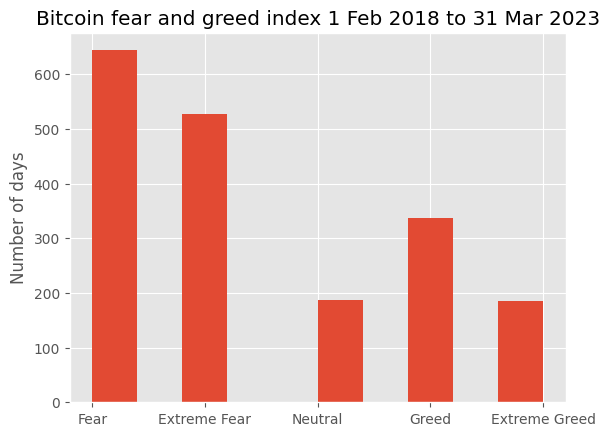

In [19]:
bar_chart = df["Value_Classification"].hist()
bar_chart.set_title('Bitcoin fear and greed index 1 Feb 2018 to 31 Mar 2023')
bar_chart.set_ylabel('Number of days')


print(df["Value_Classification"].value_counts())

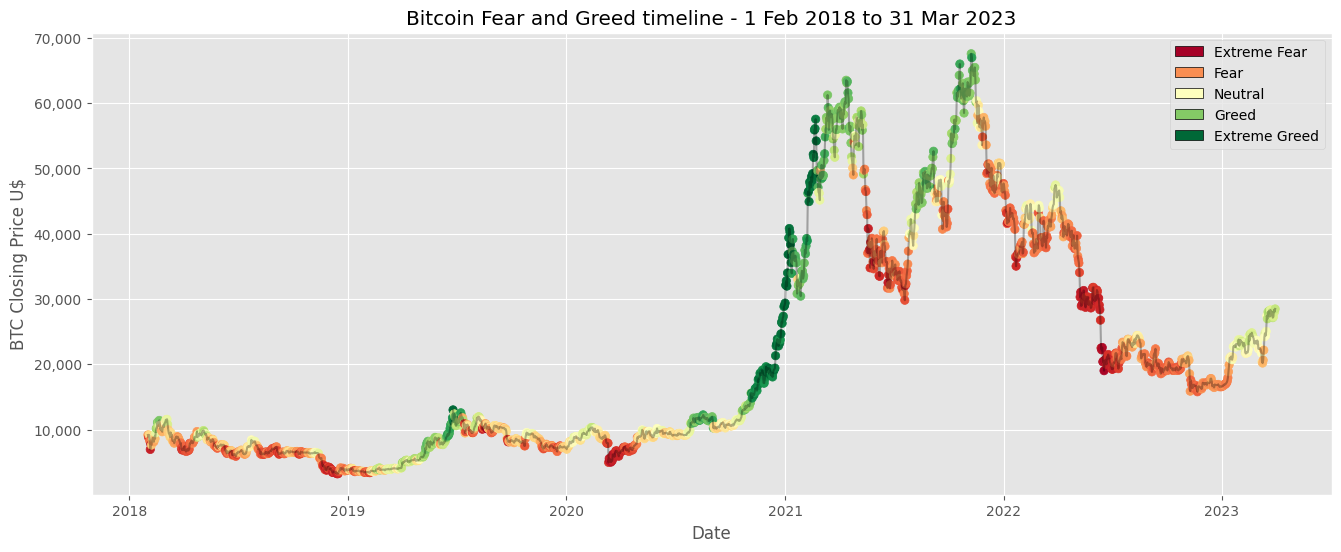

In [20]:
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt


def format_yaxis(value, tick_number):
    return f'{value:,.0f}'

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Normalize the Value column to be between 0 and 1
df['Value_Norm'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())

# Change the theme
plt.style.use('ggplot')

# Create a colormap that maps normalized values to colors
cmap = plt.get_cmap('RdYlGn')

# Plot the data using the scatter and plot functions
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(df['Date'], df['BTC_Closing'], c=df['Value_Norm'], cmap=cmap)
ax.plot(df['Date'], df['BTC_Closing'], c='black', alpha=0.3)

# Set the title and axis labels
ax.set_title('Bitcoin Fear and Greed timeline - 1 Feb 2018 to 31 Mar 2023')
ax.set_xlabel('Date')
ax.set_ylabel('BTC Closing Price U$')

# Create custom legend handles and labels
handles = [
    Patch(facecolor=cmap(0.0), edgecolor='black', label='Extreme Fear'),
    Patch(facecolor=cmap(0.25), edgecolor='black', label='Fear'),
    Patch(facecolor=cmap(0.5), edgecolor='black', label='Neutral'),
    Patch(facecolor=cmap(0.75), edgecolor='black', label='Greed'),
    Patch(facecolor=cmap(1.0), edgecolor='black', label='Extreme Greed')
]
labels = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# Add a custom legend to the plot
ax.legend(handles=handles, labels=labels)

# Format the y-axis tick labels to include a thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))


plt.show()

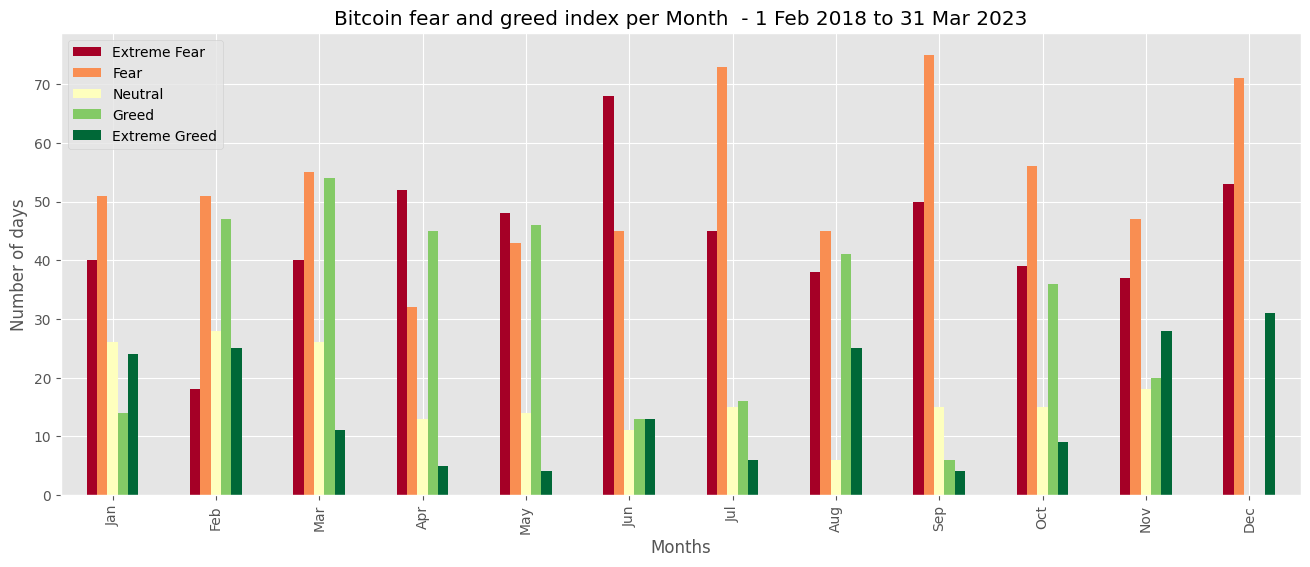

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Extract the short name of the month from the date column
df['month'] = df['Date'].dt.strftime('%b')
df

# Create the pivot table
pivot = pd.pivot_table(df,
                       index='month',
                       columns='Value_Classification',
                       values='Value',
                       aggfunc='count')

# Define the month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reorder the index
pivot = pivot.reindex(month_order)

# Define the column order
column_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# Reorder the columns
pivot = pivot.reindex(column_order, axis=1)

# Change the theme
plt.style.use('ggplot')

# Create a custom color map
cmap = plt.get_cmap('RdYlGn')

# Create the bar chart
ax = pivot.plot(kind='bar',
                title='Bitcoin fear and greed index per Month  - 1 Feb 2018 to 31 Mar 2023',
                xlabel='Months',
                ylabel='Number of days',
                figsize=(16, 6),
                colormap=cmap,
                legend=False)


# Create a custom legend
ax.legend(column_order)

# Show the plot
plt.show()

In [22]:
# Subset the data to extreme fear and extreme greed periods
fear = df[df['Value'] <= 20]
greed = df[df['Value'] >= 80]

# Perform the t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(fear['BTC_Closing'], greed['BTC_Closing'], equal_var=False)

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -6.6149041384538965
p-value: 3.5389185371976455e-10
